<a href="https://colab.research.google.com/github/Harsha194/Elevate_Labs_Tasks/blob/main/Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear SVM Accuracy: 0.8713
RBF Kernel SVM Accuracy: 0.8830


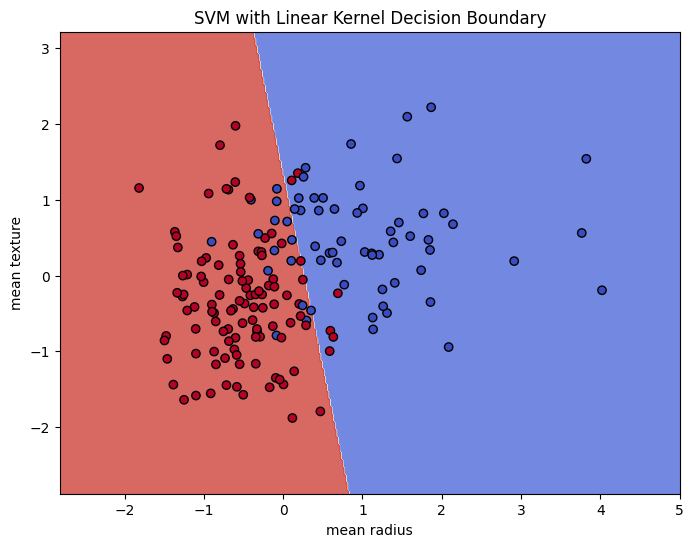

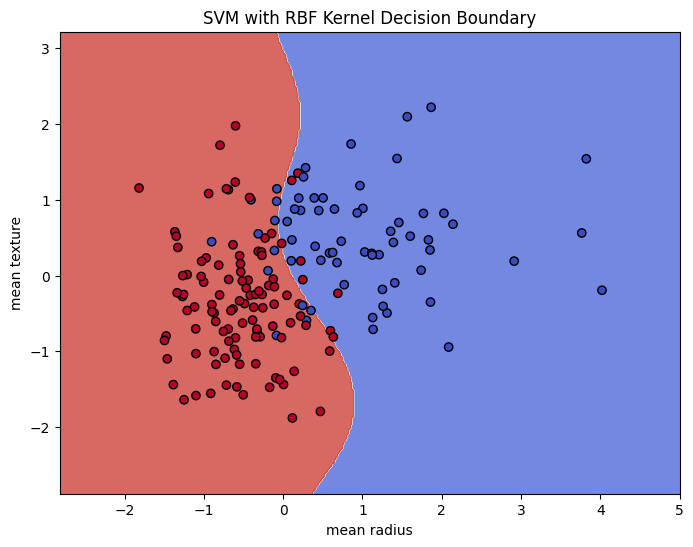

Best parameters from GridSearchCV: {'C': 100, 'gamma': 0.1}
Best cross-validation accuracy: 0.9072
Test Accuracy of best SVM: 0.8889


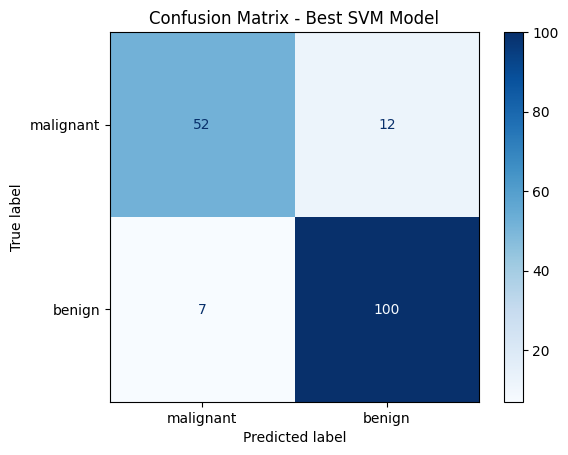

Cross-validated accuracy: 0.8928 (+/- 0.0535)


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
feature_names = breast_cancer.feature_names


X_vis = X[:, :2]


X_train, X_test, y_train, y_test = train_test_split(X_vis, y, test_size=0.3, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)
acc_linear = accuracy_score(y_test, y_pred_linear)
print(f"Linear SVM Accuracy: {acc_linear:.4f}")


svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"RBF Kernel SVM Accuracy: {acc_rbf:.4f}")


def plot_decision_boundary(X, y, model, title):
    h = .02

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.show()

plot_decision_boundary(X_test_scaled, y_test, svm_linear, "SVM with Linear Kernel Decision Boundary")
plot_decision_boundary(X_test_scaled, y_test, svm_rbf, "SVM with RBF Kernel Decision Boundary")


param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1, 10]
}
grid_search = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
print(f"Best parameters from GridSearchCV: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")


best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)
acc_best = accuracy_score(y_test, y_pred_best)
print(f"Test Accuracy of best SVM: {acc_best:.4f}")


cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=breast_cancer.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Best SVM Model")
plt.show()


X_scaled_full = scaler.fit_transform(X_vis)
cv_scores = cross_val_score(best_svm, X_scaled_full, y, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")
